# Exploratory Analysis of the Bike Sharing Dataset 🚲📊

Welcome to the exploratory analysis of the Bike Sharing dataset! This notebook is based on the Bike Sharing dataset obtained from the UCI Machine Learning Repository. We will be focusing on the hourly data file, i.e., hour.csv.

The analysis presented here is built upon the work of Fanaee-T and Gama, who explored event labeling techniques combining ensemble detectors and background knowledge. For further details, you can refer to the article "Event labeling combining ensemble detectors and background knowledge," published in Progress in Artificial Intelligence (2013) by Springer Berlin Heidelberg.

**Created by: José Rubén García García**

**March, 2024**


## EDA - Exploratory Data Analysis

I'll cover some techniques from the EDA process in order to understand and explore the dataset that will be used then to forecast the bike rental demand of the bike sharing program. 

In [1]:
#Importing proper modules

# data manipulation 
import numpy as np
import pandas as pd

# plotting
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sn.set_style('whitegrid')
sn.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

# pandas display data frames as tables
from IPython.display import display, HTML

### Preprocessing

In [4]:

#Loading the data 
hour_df = pd.read_csv('hour.csv')
print("Shape of the dataset::{}".format(hour_df.shape))

Shape of the dataset::(17379, 17)


In [6]:
#Showing the first 5 rows of the dataset using the head method
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
#Checking the different types of data in each feature
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
# dataset summary stats
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [15]:
#Cleaning attribute names
hour_df.rename(columns={'instant' : 'rec_id',
                        'dteday' : 'datetime',
                        'holiday' : 'is_holiday',
                        'workingday' : 'is_workingday',
                        'weathersit' : 'weather_condition',
                        'hum' : 'humidity',
                        'mnth' : 'month',
                        'cnt' : 'total_count',
                        'hr' : 'hour',
                        'yr' : 'year'
                        },inplace=True)

# validating changes
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
#Datetime feature conversion to datetime
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

In [17]:
#Changing other feature type to a categorical one
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

hour_df.head()



,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Visualization of Distribution and Trends in the data. 



[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

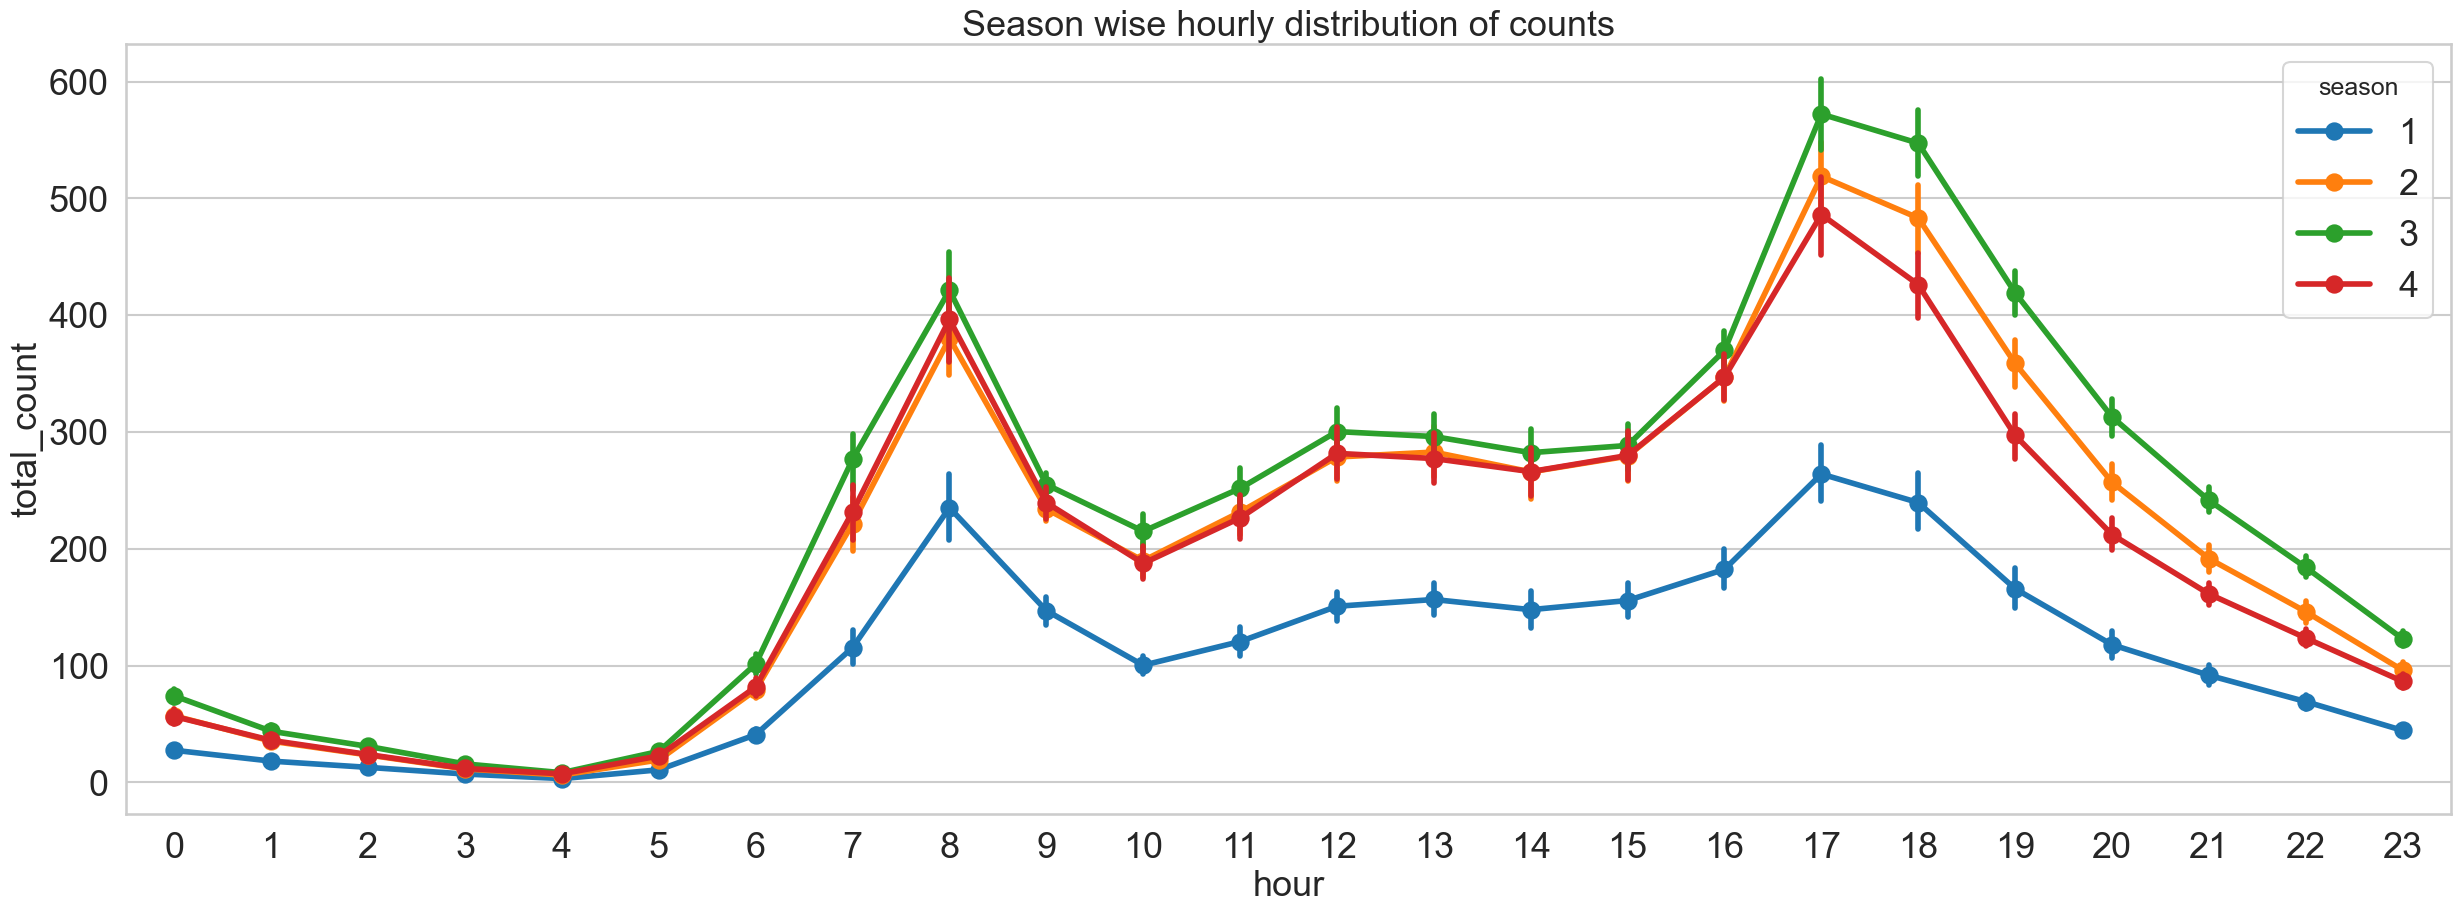

In [18]:
#Checking the hourly ridership count across the seasons

fig, ax = plt.subplots()
sn.pointplot(data=hour_df[['hour',
                           'total_count',
                           'season']],
             x='hour', y='total_count', 
             hue='season',
             ax=ax)
ax.set(title="Season wise hourly distribution of counts")

This plot is showing similar trends between the 4 seasons, I detect a peak of users by the morning and by the 17 to 18 hours this is more related in my opinion to workers/students whose are using the service in order to avoid the usage of car. 

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

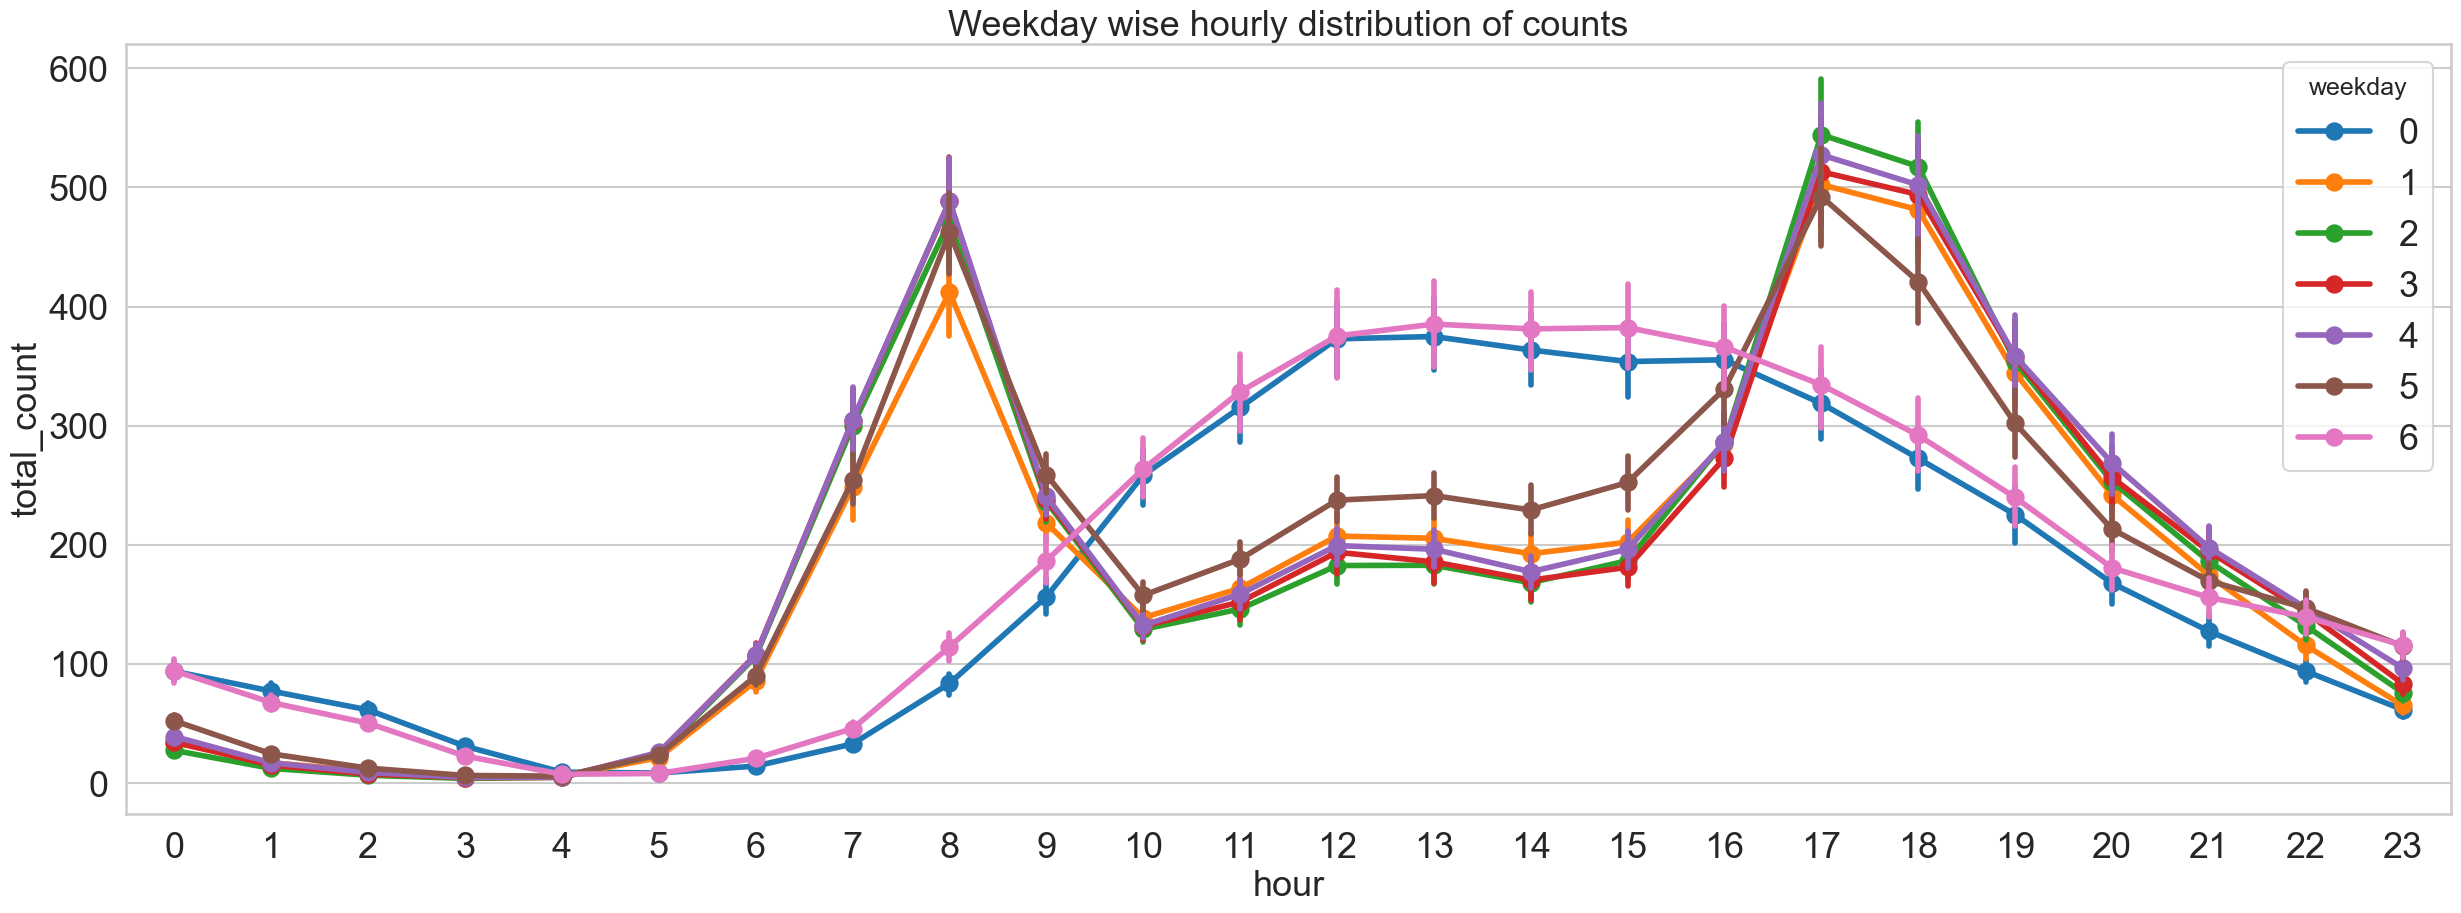

In [22]:
#Checking the hourly ridership count across the days of the week

fig, ax = plt.subplots()
sn.pointplot(data=hour_df[['hour',
                           'total_count',
                           'weekday']],
             x='hour', y='total_count', 
             hue='weekday',
             ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

I noticed that service is not being used in the same direction during weekend compared to working days (Red and blue line), obviously this is in function that people are not in the street and prefer to be at home. Another important point is that people uses more the service on friday around the 11-16 hours, fact that does not happening with the other working days (Label 1 to 5). Out of that I can see that by hour working days are in the same trend. 

/var/folders/p9/kd2njf997_7bs4hbnrvzl6yc0000gp/T/ipykernel_44479/329806591.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(data=hour_df[['hour', 'total_count']],


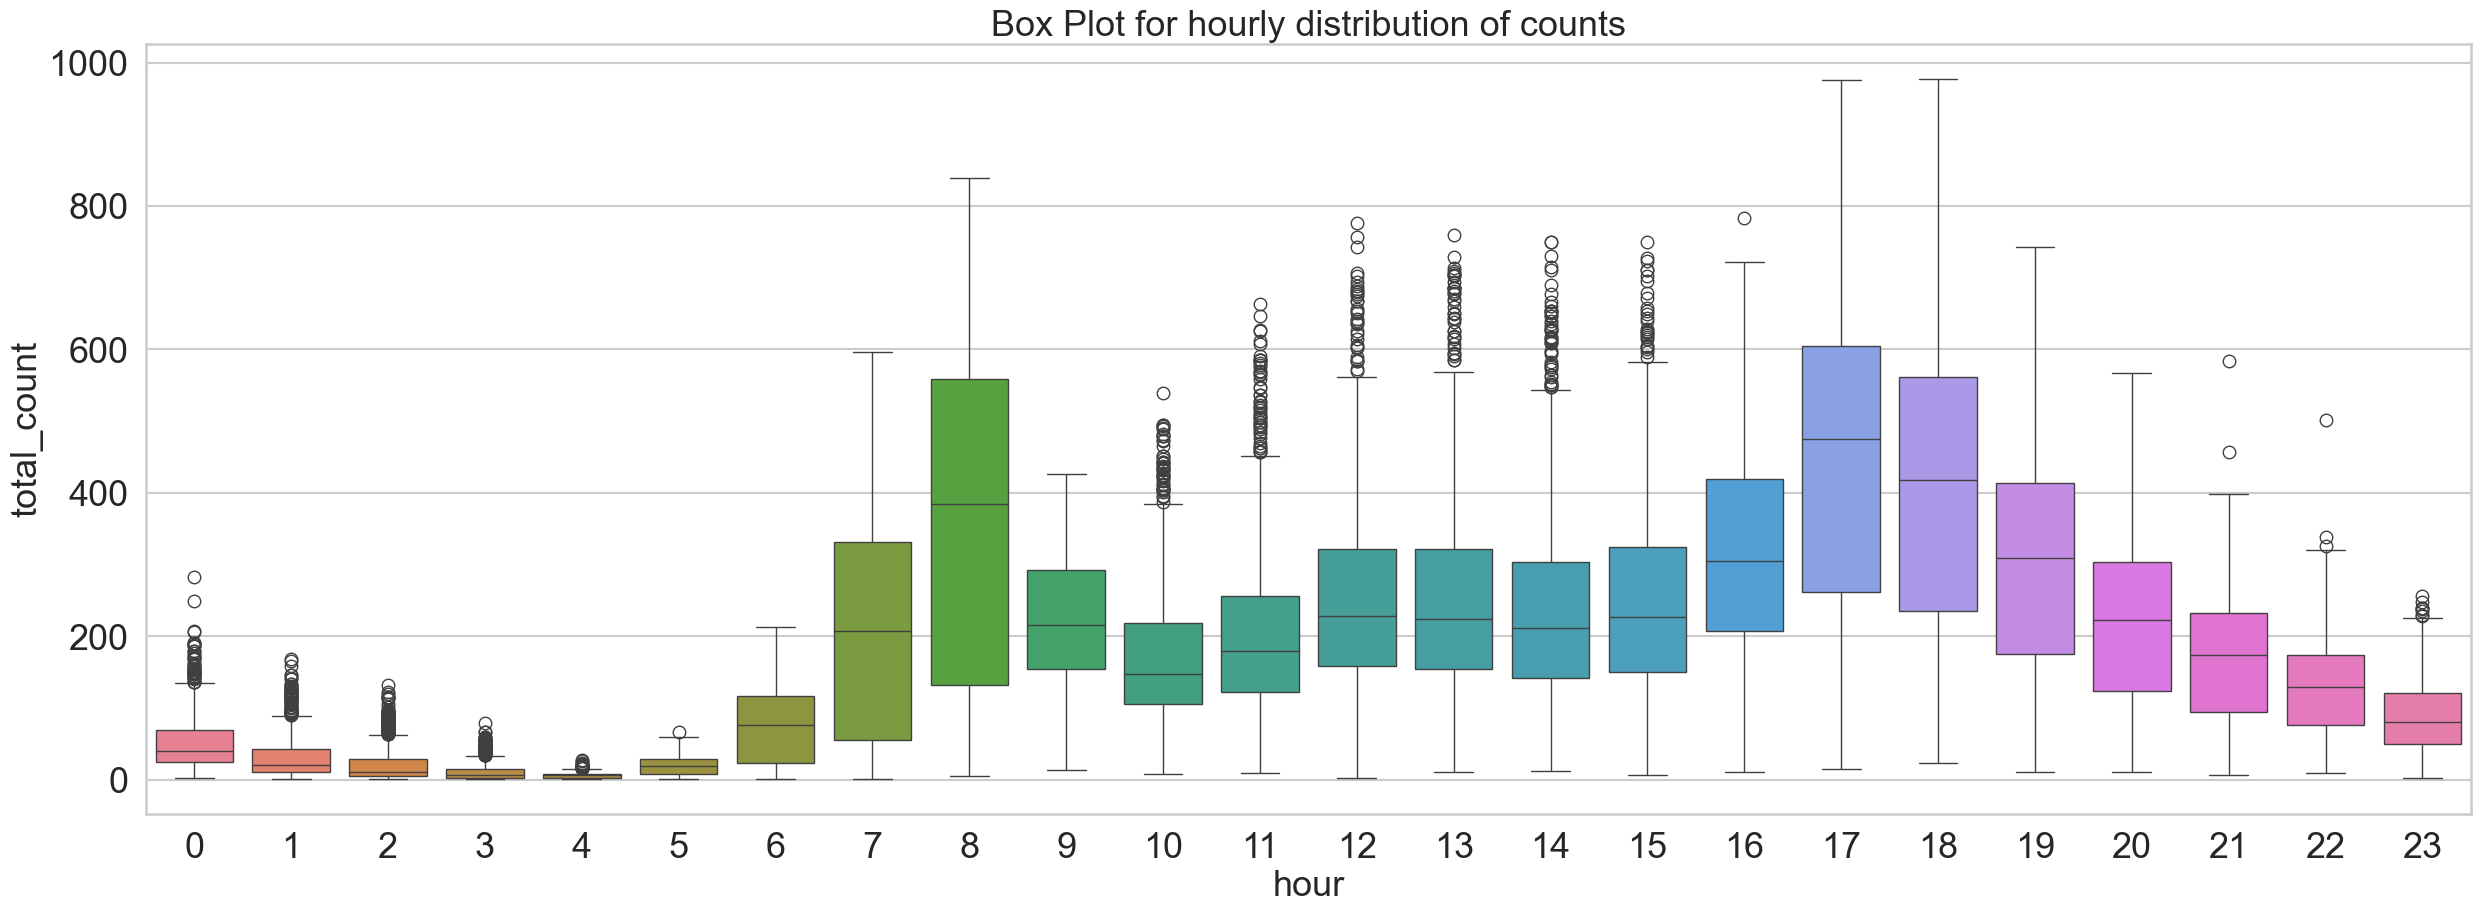

In [28]:
#Plotting the trends using a boxplot

# Define the color palette
colors = sn.color_palette("husl", n_colors=len(hour_df['hour'].unique()))

# Create the boxplot with specified colors
fig, ax = plt.subplots()
sn.boxplot(data=hour_df[['hour', 'total_count']],
            x="hour", y="total_count", palette=colors, ax=ax)
ax.set(title="Box Plot for hourly distribution of counts")
plt.show()

**Finding**
- Afternoon have a lot of outliers as well as the midnight hours. 

/var/folders/p9/kd2njf997_7bs4hbnrvzl6yc0000gp/T/ipykernel_44479/2878530708.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(data=hour_df[['month', 'total_count']],


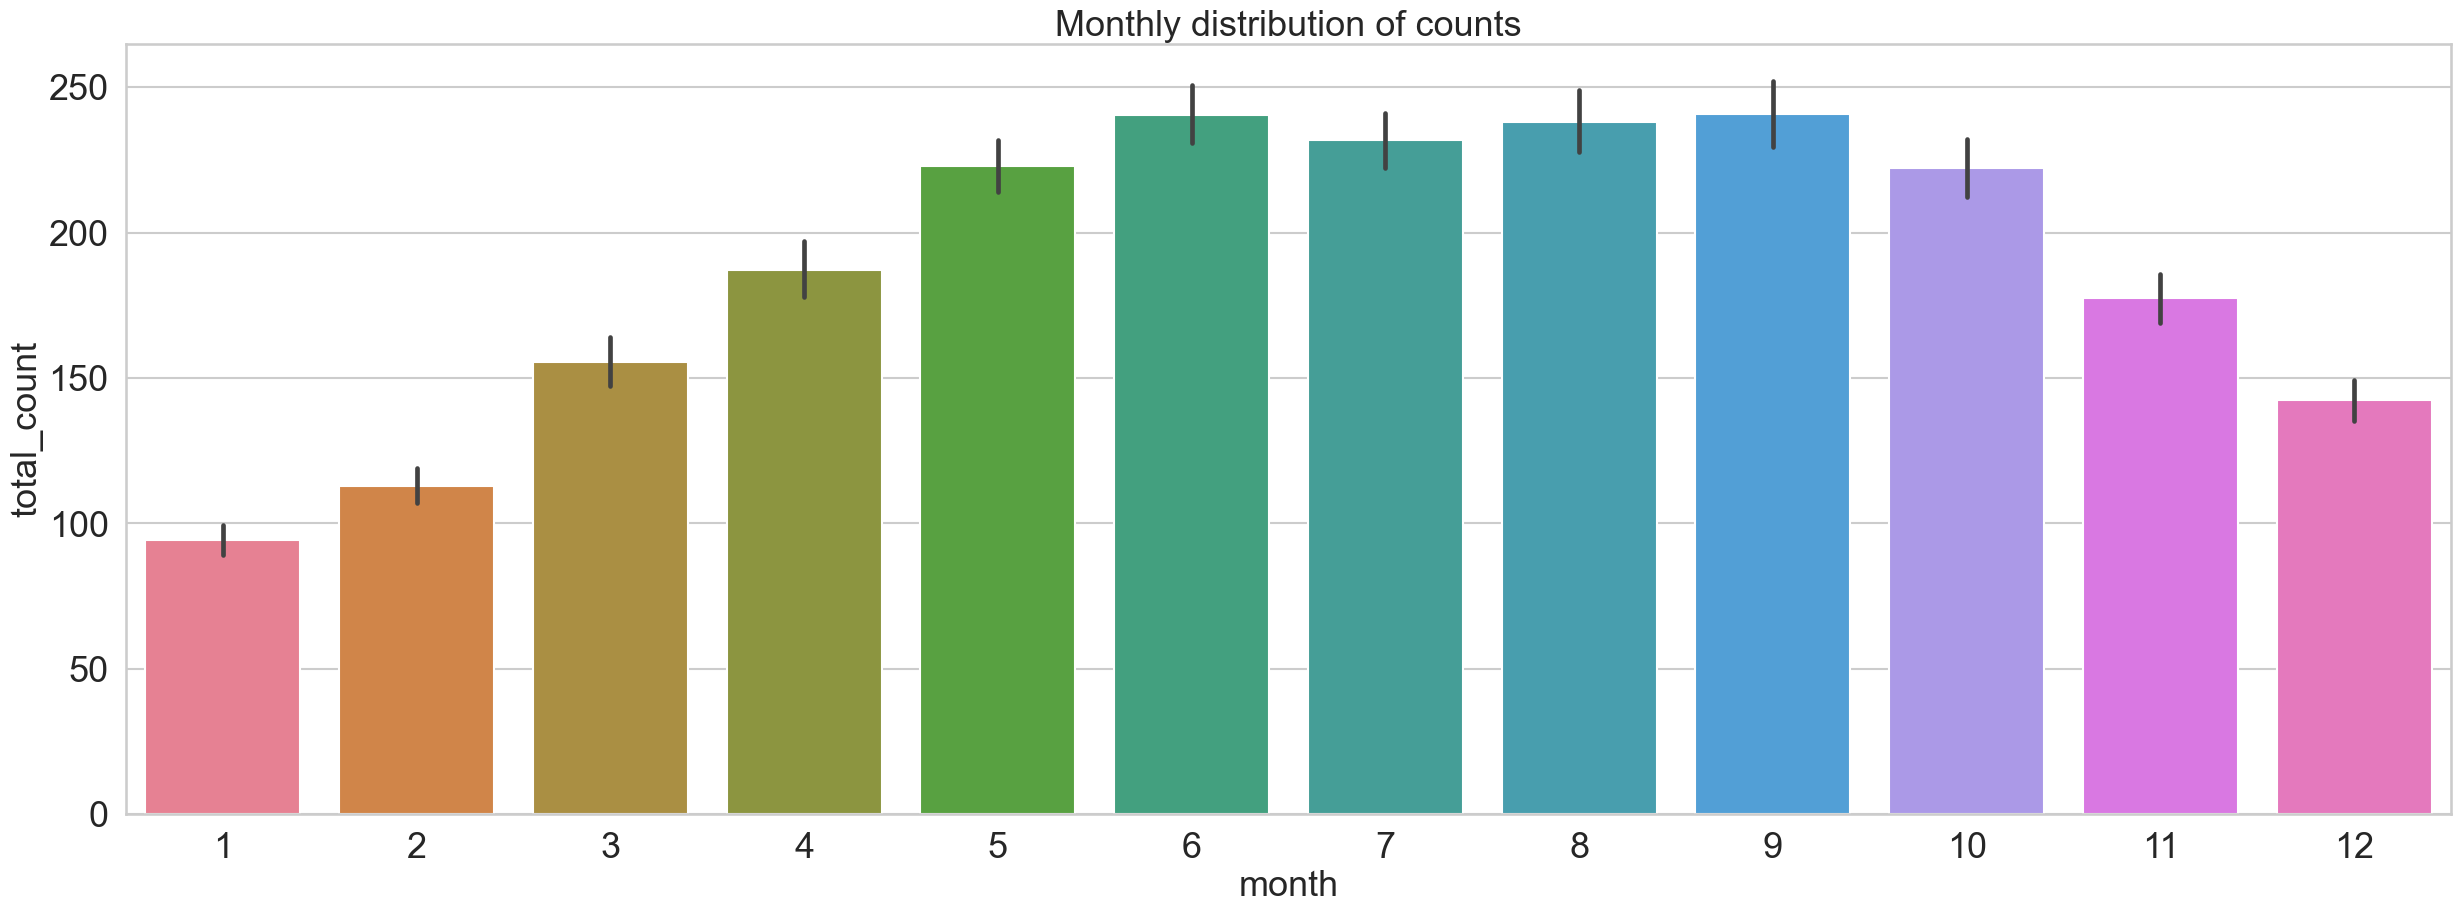

In [25]:
#Plotting the monthly distribution of counts using a barplot

# Define the color palette
colors = sn.color_palette("husl", n_colors=len(hour_df['month'].unique()))

# Create the barplot with specified colors
fig, ax = plt.subplots()
sn.barplot(data=hour_df[['month', 'total_count']],
            x="month", y="total_count", palette=colors)
ax.set(title="Monthly distribution of counts")
plt.show()


**Findings**
- Users prefer to use the service during summer-fall season. 

/var/folders/p9/kd2njf997_7bs4hbnrvzl6yc0000gp/T/ipykernel_44479/1015851817.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(data=spring_df[plot_col_list], x="month", y="total_count", ax=ax[0][0], palette=[colors[0]])
/var/folders/p9/kd2njf997_7bs4hbnrvzl6yc0000gp/T/ipykernel_44479/1015851817.py:15: UserWarning: 
The palette list has fewer values (1) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sn.barplot(data=spring_df[plot_col_list], x="month", y="total_count", ax=ax[0][0], palette=[colors[0]])
/var/folders/p9/kd2njf997_7bs4hbnrvzl6yc0000gp/T/ipykernel_44479/1015851817.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(data=summer_df[plot_col_list], x

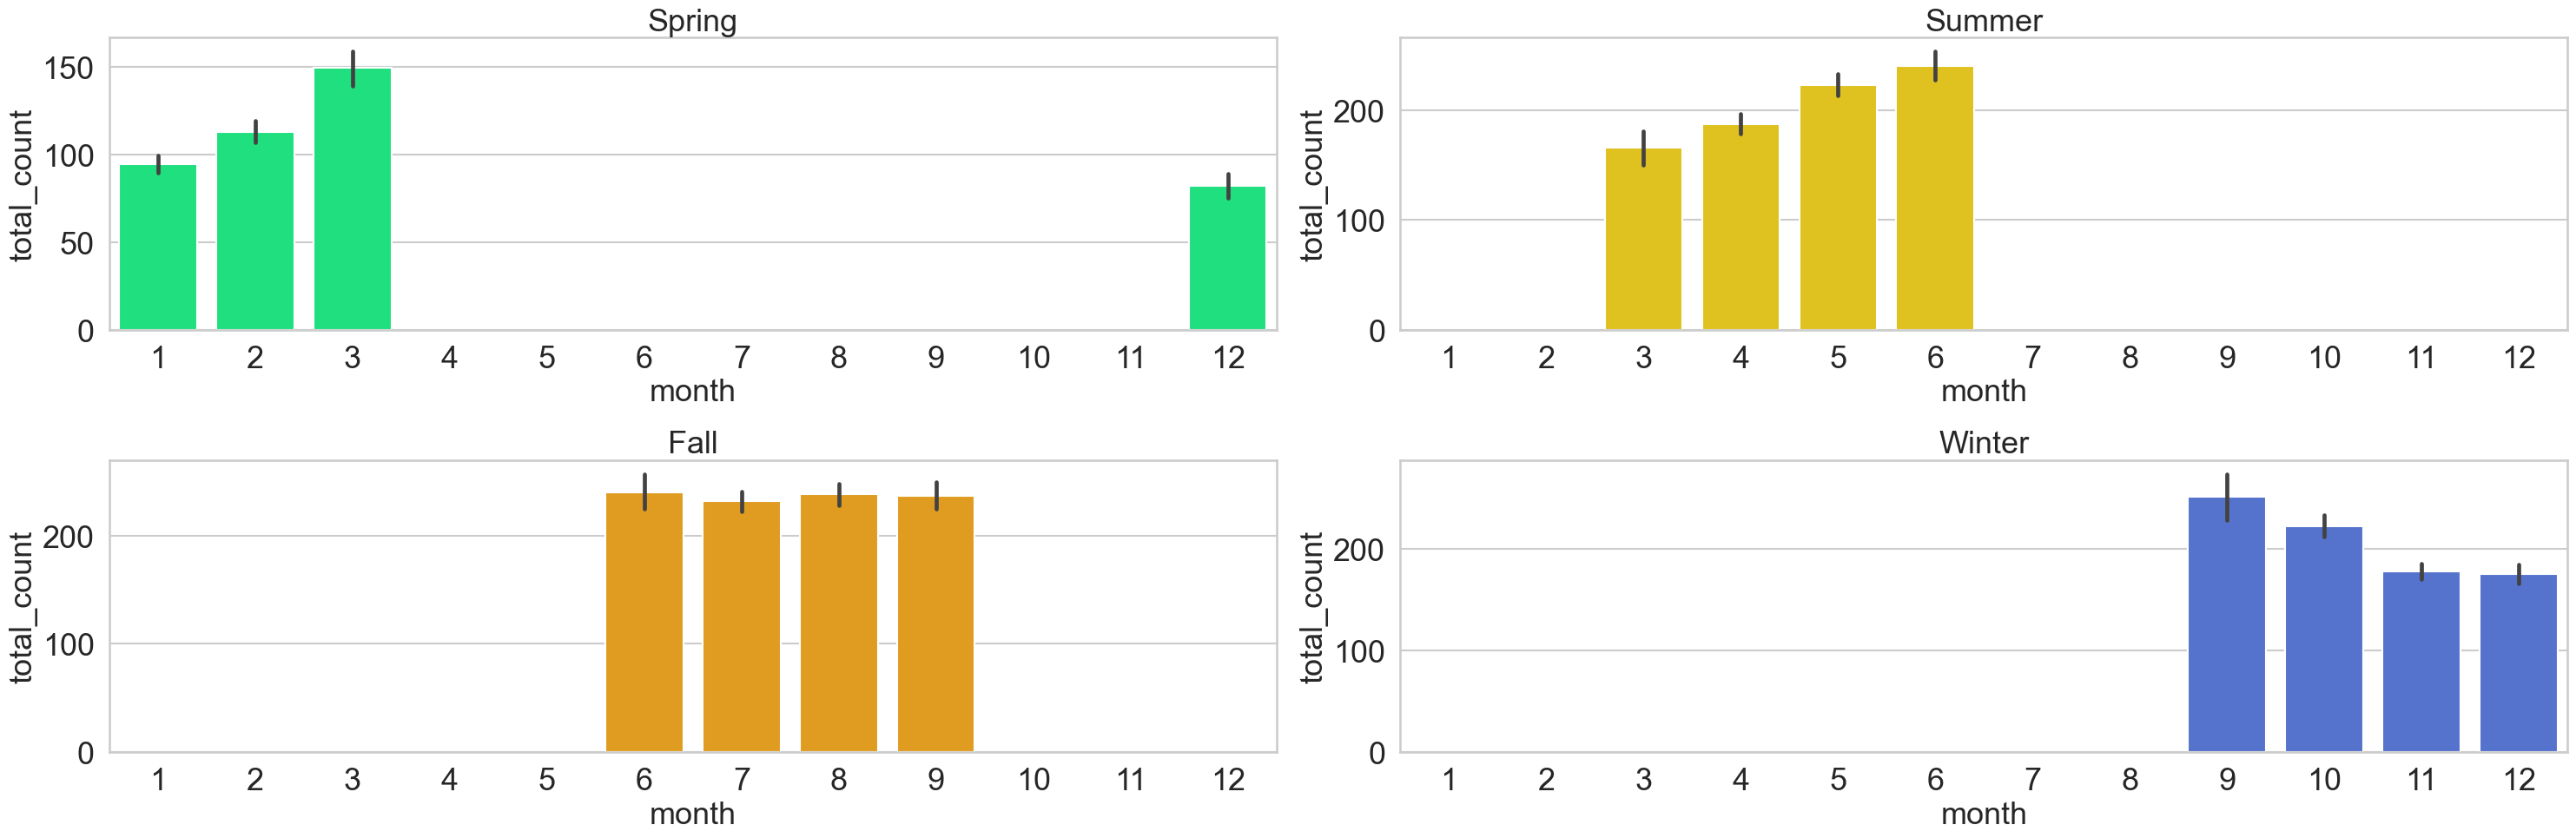

In [31]:
# Define the color palette for each season
colors = ["springgreen", "gold", "orange", "royalblue"]

df_col_list = ['month','weekday','total_count']
plot_col_list= ['month','total_count']
spring_df = hour_df[hour_df.season==1][df_col_list]
summer_df = hour_df[hour_df.season==2][df_col_list]
fall_df = hour_df[hour_df.season==3][df_col_list]
winter_df = hour_df[hour_df.season==4][df_col_list]

# Create subplots
fig, ax = plt.subplots(nrows=2, ncols=2)

# Plot for Spring
sn.barplot(data=spring_df[plot_col_list], x="month", y="total_count", ax=ax[0][0], palette=[colors[0]])
ax[0][0].set(title="Spring")

# Plot for Summer
sn.barplot(data=summer_df[plot_col_list], x="month", y="total_count", ax=ax[0][1], palette=[colors[1]])
ax[0][1].set(title="Summer")

# Plot for Fall
sn.barplot(data=fall_df[plot_col_list], x="month", y="total_count", ax=ax[1][0], palette=[colors[2]])
ax[1][0].set(title="Fall")

# Plot for Winter
sn.barplot(data=winter_df[plot_col_list], x="month", y="total_count", ax=ax[1][1], palette=[colors[3]])
ax[1][1].set(title="Winter")

# Adjust layout
plt.tight_layout()
plt.show()

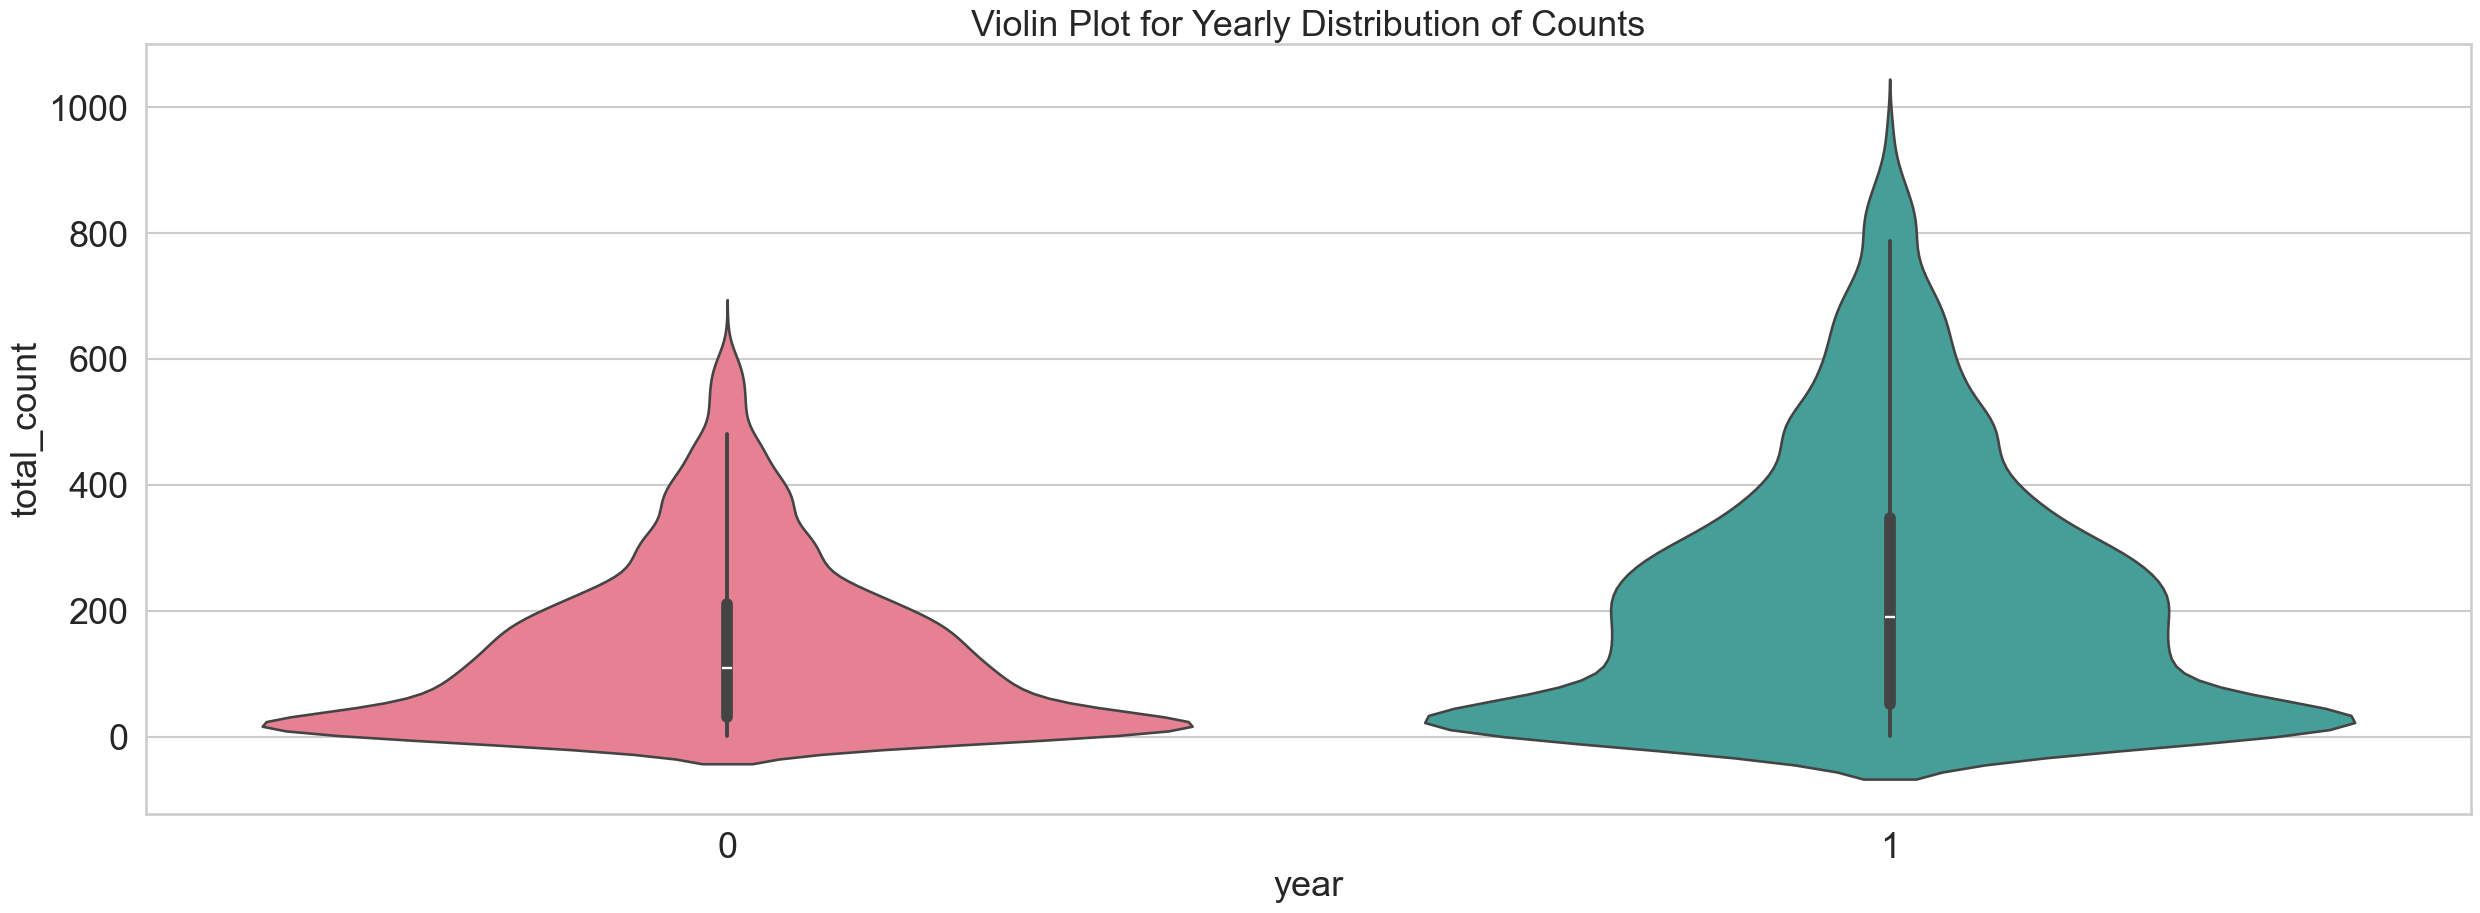

In [35]:
#Yearly distribution using violin plot

# Define the color palette for each plot
colors = sn.color_palette("husl", n_colors=2)

# Create the violin plot with specified color
sn.violinplot(data=hour_df[['year', 'total_count']],
               x='year', y='total_count', hue='year', palette=colors, legend=False)
plt.title("Violin Plot for Yearly Distribution of Counts")
plt.show()

**Finding**
- Second year (2012) has more distribution compared with the numbers of 2011 (red violin) overmore 2011 has lower counts overall with a lower median

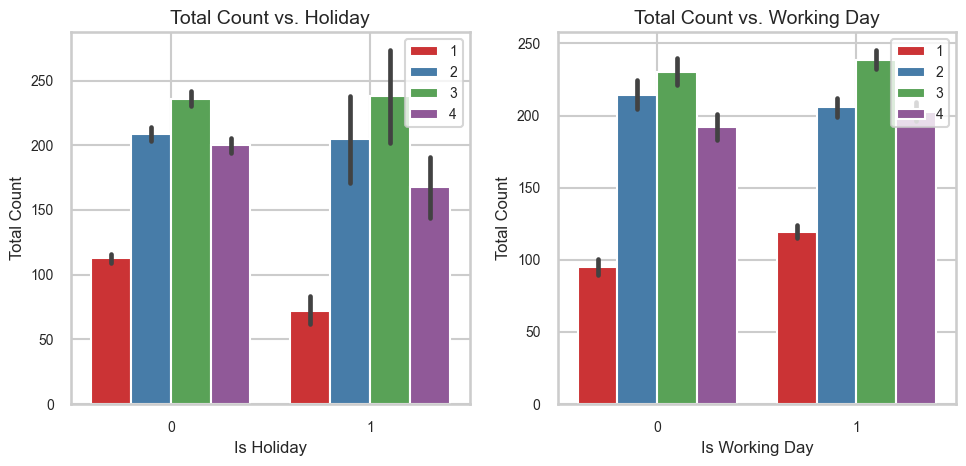

In [48]:
#Working days vs Holiday distribution across the seasons

# Create subplots with smaller size
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Adjust the width of the bars
sn.barplot(data=hour_df, x='is_holiday', y='total_count', hue='season', ax=ax1, palette='Set1', dodge=True)
sn.barplot(data=hour_df, x='is_workingday', y='total_count', hue='season', ax=ax2, palette='Set1', dodge=True)

# Add labels and title with smaller font size
ax1.set_xlabel('Is Holiday', fontsize=12)
ax1.set_ylabel('Total Count', fontsize=12)
ax1.set_title('Total Count vs. Holiday', fontsize=14)

ax2.set_xlabel('Is Working Day', fontsize=12)
ax2.set_ylabel('Total Count', fontsize=12)
ax2.set_title('Total Count vs. Working Day', fontsize=14)

# Adjust legend location for better visibility
ax1.legend(loc='upper right', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

# Set smaller font size for ticks on both axes
ax1.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

# Add gridlines
ax1.grid(True)
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Findings**
- *Is Holiday:* People don't use to much the service during season 1 when is holiday, the other seasons trends show similar distributions
- *Is Working day:* Distribution and trends looks pretty similar in both cases across the seasons. 

### Outliers 
Since is a good habit to caught outliers during the EDA process I'll plot some charts in order to identify it by looking in numeric features. 

<Axes: >

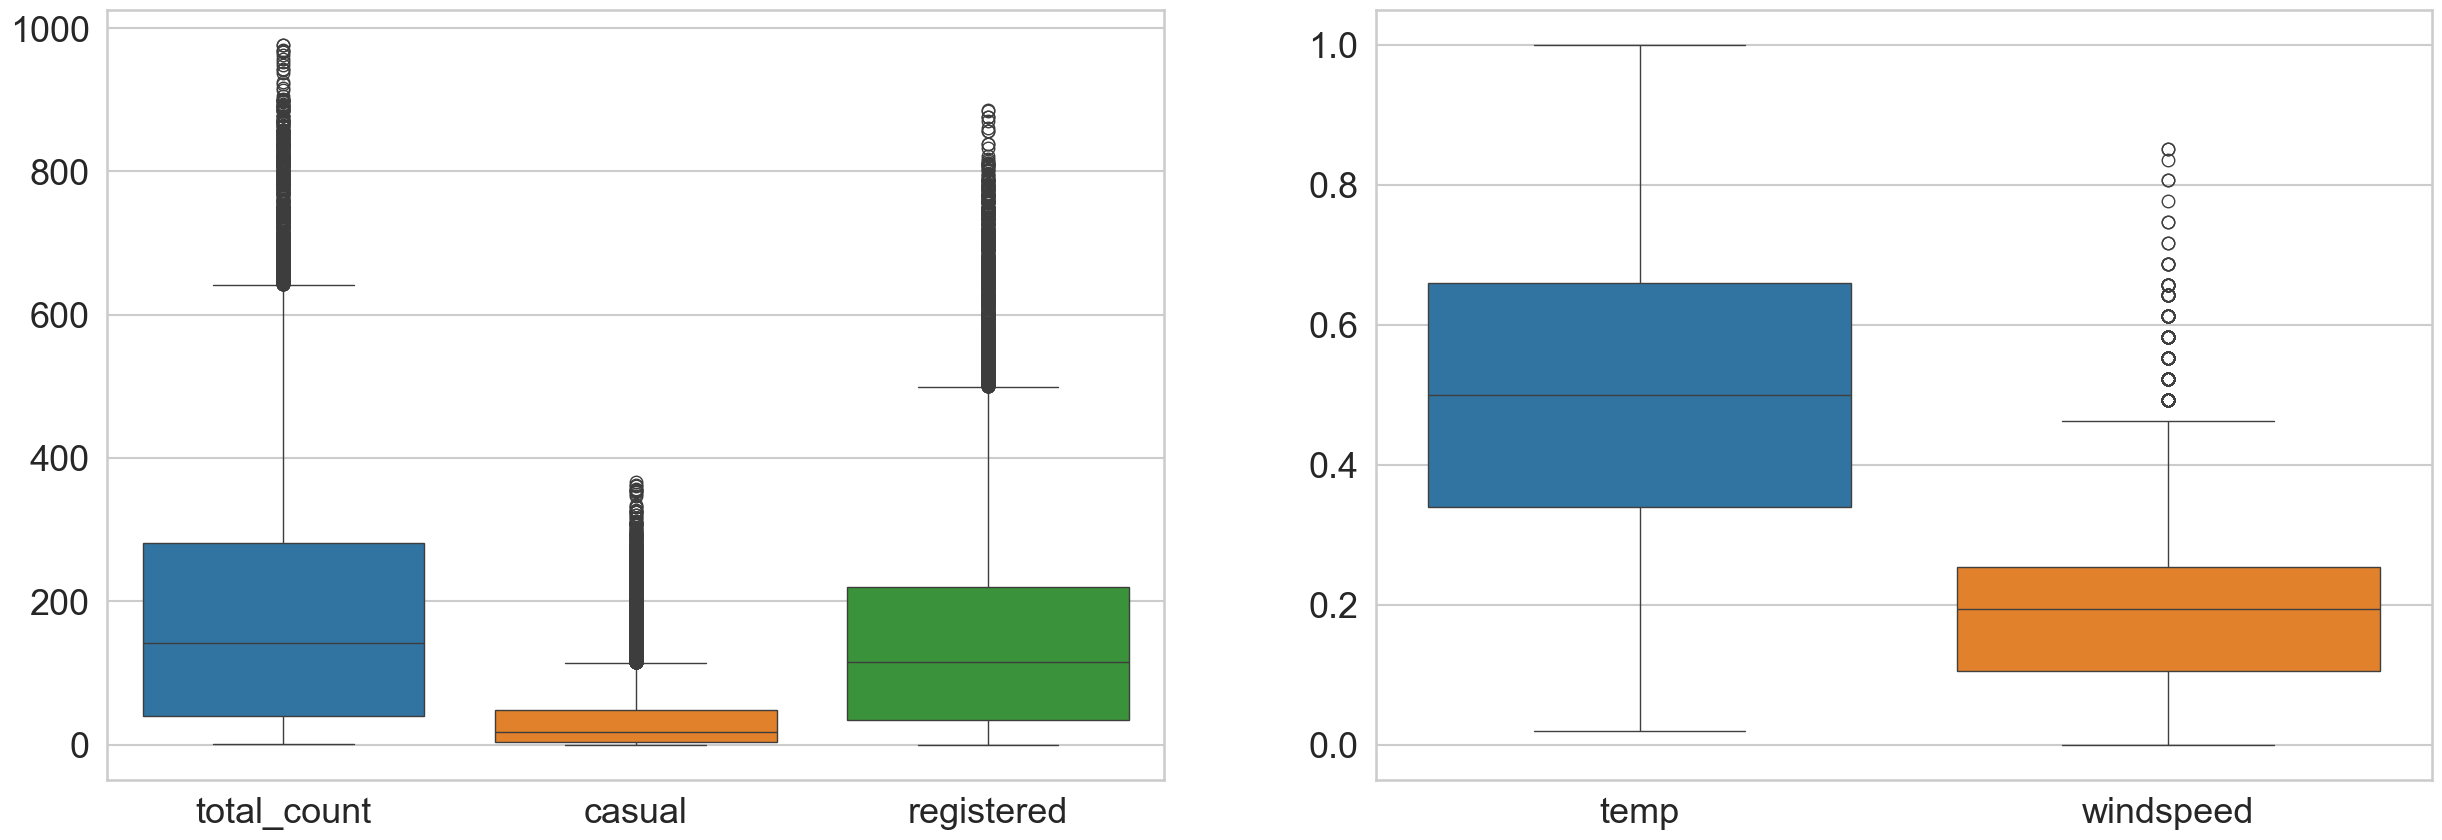

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
sn.boxplot(data=hour_df[['total_count',
                         'casual', 'registered']], ax=ax1)
sn.boxplot(data=hour_df[['temp', 'windspeed']],ax=ax2)

**Finding**
- 1st Chart. The 3 features all had a sizable number of outliers, in addition the casual feature registered lower values 
- 2nd Chart. I just found outliers for the windspeed feature

### Correlation

This method help us to identify and understand relationship between the all the features of the dataset and can be represented in different ways.

One good idea is to understand that correlation does not implies causation, so a good habit is to explore and understand properly each feature in order to take decisions.  

<Axes: >

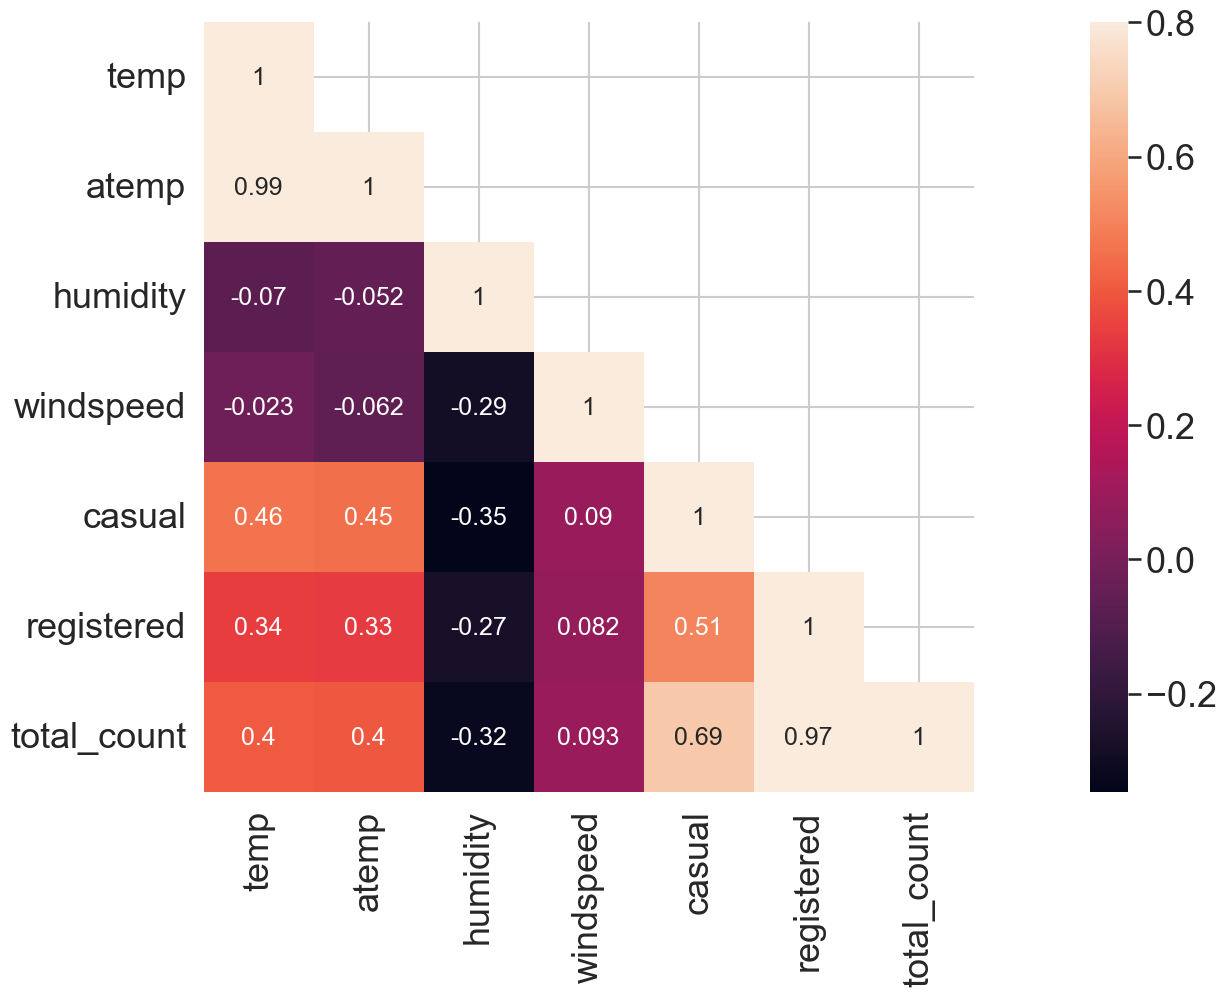

In [49]:
#Creating a correlation matrix to show it in a heatmap
corrMatt = hour_df[['temp', 'atemp','humidity','windspeed', 'casual', 'registered', 'total_count']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

**Finding**
- The correlation between temp and atemp is notably high, which aligns with expectations.
- Similarly, there's a strong correlation between registered-total_count and casual-total_count.
- Windspeed exhibits a negative correlation with humidity.
- However, the overall correlational statistics indicate moderate associations.